In this project, we will learn about football players using multiple linear regression. If I give an example about this information:
Contribution of the players to the score according to the position they play
Average market value by age and club they play for
Number of yellow and red cards received according to the position they play

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:

df = pd.read_csv("players.csv")
df.head()

,Unnamed: 0,Name,Position,Age,Market Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1
2,2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2
3,3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8
4,4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   500 non-null    int64  
 1   Name                         500 non-null    object 
 2   Position                     500 non-null    object 
 3   Age                          500 non-null    int64  
 4   Market Value In Millions(£)  500 non-null    float64
 5   Country                      500 non-null    object 
 6   Club                         500 non-null    object 
 7   Matches                      500 non-null    int64  
 8   Goals                        500 non-null    int64  
 9   Own Goals                    500 non-null    int64  
 10  Assists                      500 non-null    int64  
 11  Yellow Cards                 500 non-null    int64  
 12  Second Yellow Cards          500 non-null    int64  
 13  Red Cards           

In [4]:
#statistics for numeric columns
df.describe()

,Unnamed: 0,Age,Market Value In Millions(£),Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,24.968000,31.537800,12.396000,2.160000,0.030000,1.51200,1.592000,0.036000,0.046000,2.394000,3.744000
std,144.481833,3.165916,17.577697,4.342453,2.880102,0.170758,1.85276,1.445585,0.186477,0.209695,2.517825,3.293046
min,0.000000,16.000000,16.200000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124.750000,23.000000,19.800000,10.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,249.500000,25.000000,25.200000,13.000000,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,2.000000,3.000000
75%,374.250000,27.000000,36.000000,16.000000,3.000000,0.000000,2.00000,2.000000,0.000000,0.000000,3.250000,6.000000
max,499.000000,36.000000,144.000000,24.000000,23.000000,1.000000,12.00000,7.000000,1.000000,1.000000,13.000000,20.000000


In [5]:
#Let's check the position names
df.Position


0          Centre-Forward
1          Centre-Forward
2          Centre-Forward
3             Left Winger
4            Right Winger
              ...        
495    Attacking Midfield
496        Second Striker
497            Goalkeeper
498           Centre-Back
499           Centre-Back
Name: Position, Length: 500, dtype: object

We will delete columns that we will not use.

In [6]:
data = df.copy() 
data.drop(columns=['Number Of Substitute In'], axis=1, inplace=True)
data.drop(columns=['Number Of Substitute Out'], axis=1, inplace=True)
data.head()

,Unnamed: 0,Name,Position,Age,Market Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards
0,0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0
1,1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0
2,2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0
3,3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0
4,4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0


let's start univariate analysis

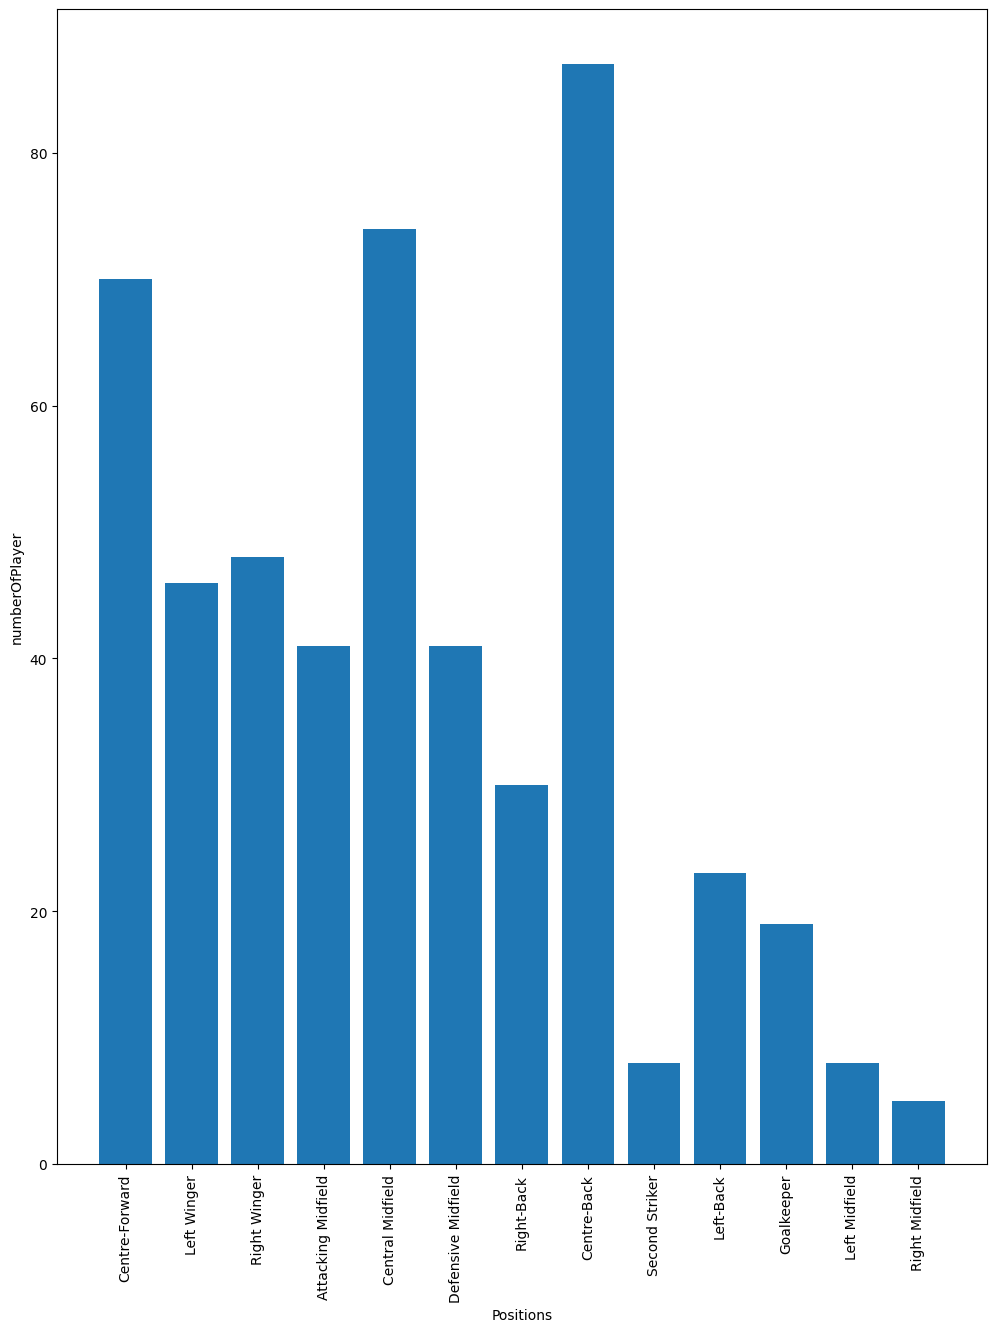

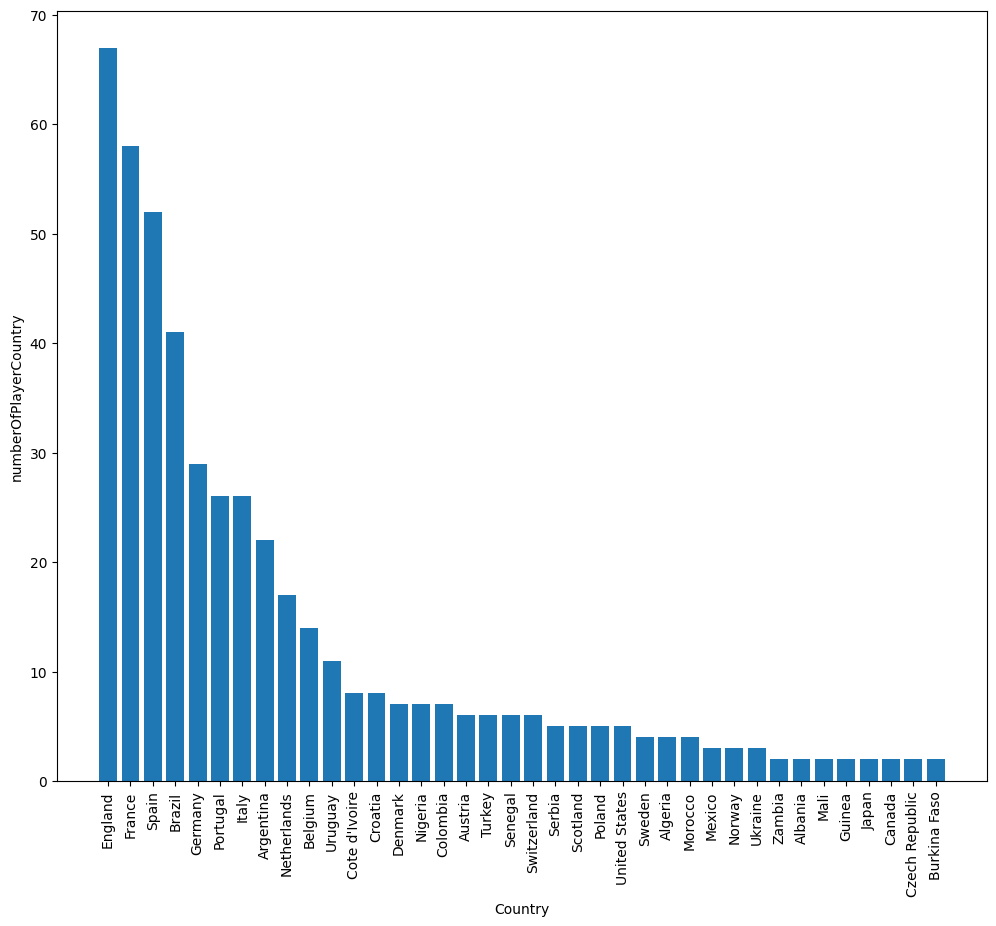

In [7]:
Positions = data['Position'].unique()
numberOfPlayer = [len(df[df['Position'] == mevki]) for mevki in Positions]



fig, ax = plt.subplots(figsize=(12,15))
ax.bar(Positions, numberOfPlayer)
ax.set_xlabel('Positions')
ax.set_ylabel('numberOfPlayer')
plt.xticks(rotation=90)



numberOfPlayerCountry = data["Country"].value_counts()
numberOfPlayerCountryFiltered = numberOfPlayerCountry[numberOfPlayerCountry > 1]
Country = numberOfPlayerCountry.index
CountryFiltered = Country[Country.isin(numberOfPlayerCountryFiltered.index)]


fig, ax = plt.subplots(figsize=(12,10))
ax.bar(CountryFiltered, numberOfPlayerCountryFiltered, width=0.8) 
ax.set_xlabel('Country')
ax.set_ylabel('numberOfPlayerCountry')
plt.xticks(rotation=90)
plt.show()


Lets starts Bivariate analysis

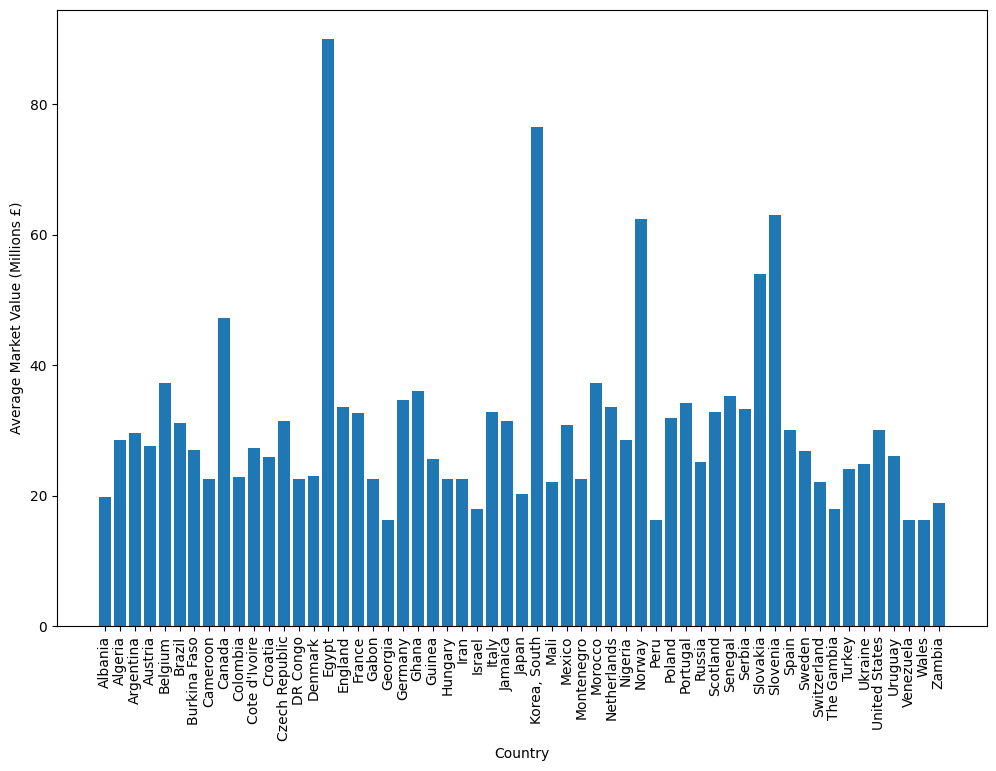

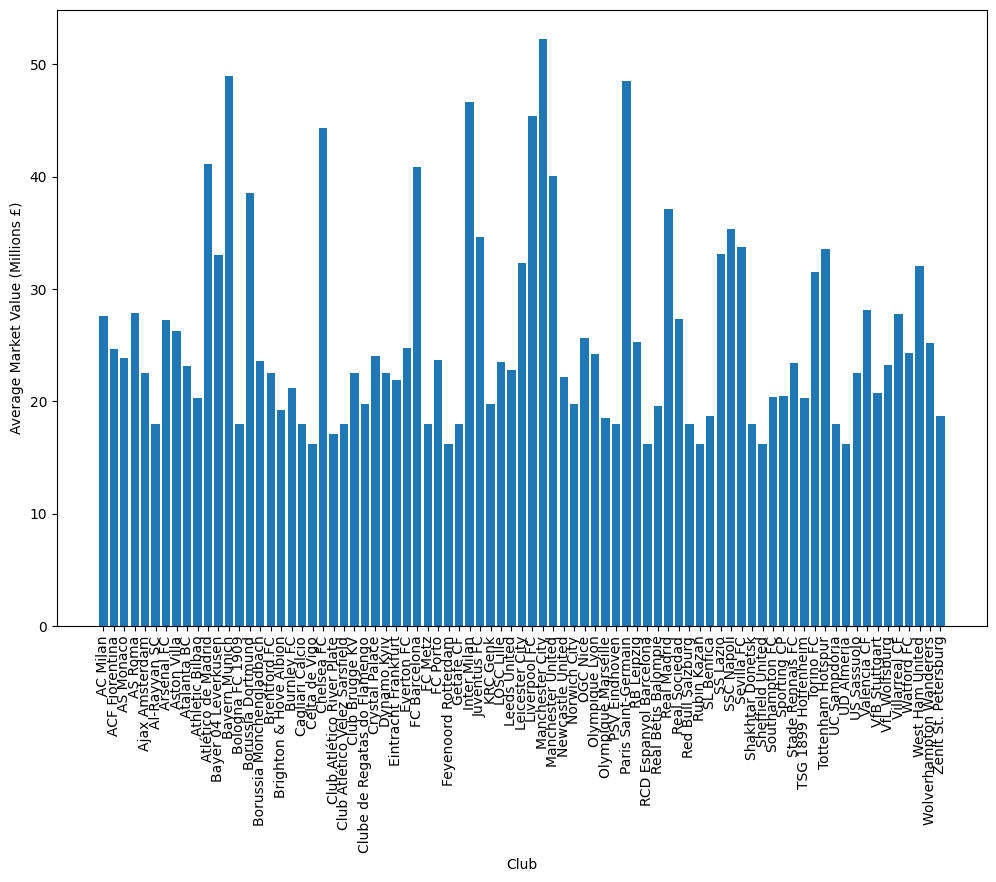

In [8]:
country_mean_price = data.groupby("Country")["Market Value In Millions(£)"].mean()
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(country_mean_price.index, country_mean_price.values)
ax.set_xlabel("Country")
ax.set_ylabel("Average Market Value (Millions £)")
plt.xticks(rotation=90)


country_mean_price = data.groupby("Club")["Market Value In Millions(£)"].mean()
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(country_mean_price.index, country_mean_price.values)
ax.set_xlabel("Club")
ax.set_ylabel("Average Market Value (Millions £)")
plt.xticks(rotation=90)
plt.show()


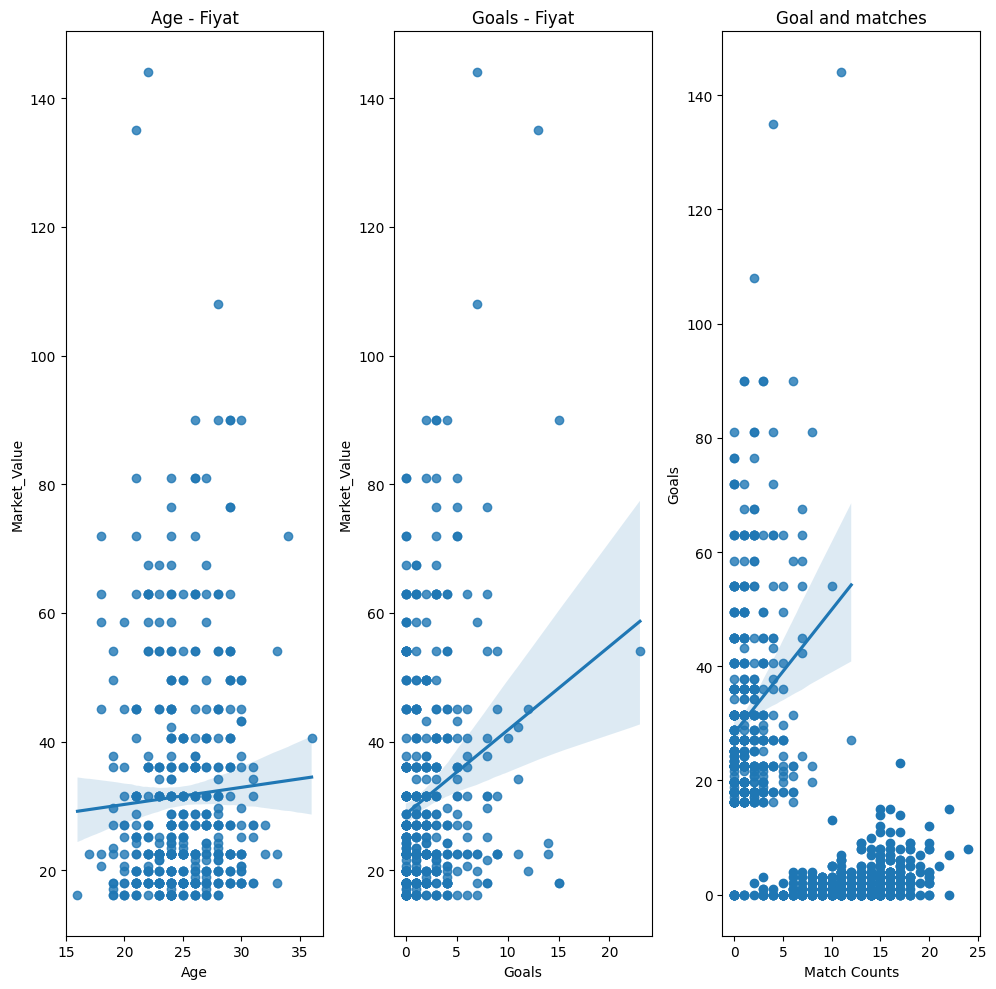

In [9]:
data = data.rename(columns={'Market Value In Millions(£)': 'Market_Value'})
plt.figure(figsize=(10,10))

cols = ["Age","Goals","Assists"]

for i in range(len(cols)):
    plt.subplot(1,3,i+1)
    plt.title(cols[i] + ' - Fiyat')
    sns.regplot(x=eval('data' + '.' + cols[i]), y=data.Market_Value)
    
plt.tight_layout()


plt.scatter(data.Matches,data.Goals)
plt.xlabel('Match Counts')
plt.ylabel('Goals')
plt.title("Goal and matches") 
plt.show()



we will calculate the goal expectations per game from the goal and match statistics of the footballers

In [10]:
data['Goal_Expectancy'] = data['Goals'] / data['Matches']
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,Name,Position,Age,Market_Value,Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Goal_Expectancy
0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0.437500
1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,1.300000
2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,0.437500
3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,0.133333
4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,1.000000


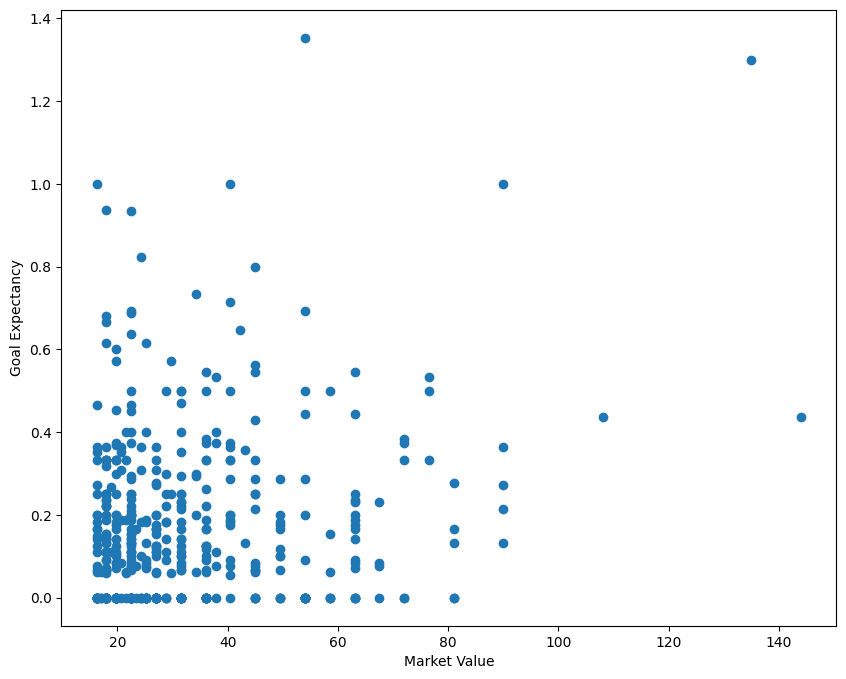

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(data["Market_Value"], data["Goal_Expectancy"])
ax.set_xlabel('Market Value')
ax.set_ylabel('Goal Expectancy')
plt.show()

In [12]:

X = data[['Goals', 'Matches', 'Goal_Expectancy']]
X = pd.DataFrame(X)
X = X.fillna(X.mean())
y = data["Market_Value"] 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
df.fillna(df.mean(), inplace=True)

In [13]:
print("X :", X.shape)
print("y :", y.shape)
y = y.values.reshape(-1, 1)
print("y :", y.shape)
data.head()

X : (500, 3)
y : (500,)
y : (500, 1)


,Name,Position,Age,Market_Value,Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Goal_Expectancy
0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0.437500
1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,1.300000
2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,0.437500
3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,0.133333
4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,1.000000


Let's split our data by taking train and test

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

print("X_train'in boyutu:", X_train.shape)
print("y_train'in boyutu:", y_train.shape)

print("X_test'in boyutu:", X_test.shape)
print("y_test'in boyutu:", y_test.shape)

lr.fit(X_train, y_train)

X_train'in boyutu: (350, 3)
y_train'in boyutu: (350, 1)
X_test'in boyutu: (150, 3)
y_test'in boyutu: (150, 1)


LinearRegression()

In [15]:
y_pred = lr.predict(X_test)

print(y_pred.shape)
print(y_test.shape)

(150, 1)
(150, 1)


In [16]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)
import math
rmse = math.sqrt(mse)
print('RMSE:', rmse)

MSE: 343.11296998421295
RMSE: 18.52330882926193


In [17]:
import statsmodels.api as sm
X_train_ols = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_train_ols)
sonuc = sm_model.fit()
sonuc.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     6.942
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           0.000151
Time:                        13:15:43   Log-Likelihood:                -1476.0
No. Observations:                 350   AIC:                             2960.
Df Residuals:                     346   BIC:                             2975.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              24.0497      3.249      7.402      0.000      17.660      30.440
Goals               0.3964      0.876      0.452      0.651      -1.327       2.120
Matches             0.3676      0.258      1.426      0.155      -0.140       0.875
Goal_Expectancy    11.0526     11.740      0.941      0.347     -12.039      34.144
==============================================================================
Omnibus:                      166.103   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              816.420
Skew:                           2.015   Prob(JB):                    5.21e-178
Kurtosis:                       9.304   Cond. No.                         179.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the p value of the goal value is greater than 0.05, it does not have much effect on the result.

In [18]:
def train_ols(X,y):
    X = sm.add_constant(X)
    lr = sm.OLS(y,X).fit()
    print(lr.summary())
    
X_train_rfemodel = X_train_ols.drop(['Goals'],axis=1)
train_ols(X_train_rfemodel, y_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     10.33
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           4.37e-05
Time:                        13:15:43   Log-Likelihood:                -1476.1
No. Observations:                 350   AIC:                             2958.
Df Residuals:                     347   BIC:                             2970.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              23.1763      2.610     

The accuracy of our model is quite low. It is difficult to find the value of football players from their score contribution because there are many factors that affect player value in football and this data did not support this.